Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?

In [1]:
import pandas as pd  # For data processing using data frames i.e, Tabular data
import seaborn as sns # To create visualizations of large data

I decided to read the given csv into pandas dataframes to perfom analysis. I then used the pandas methods head() and desrcibe() to have a peek into the data. The given dataset has 7 features with 5000 records. I am interested in finding the Average Order Value (AOV), which is usually the average total of every order placed with a merchant over a period of time (Here the time a 30 day period). 
Surprisingly the AOV value mentioned in the question ($3145.13) is very similar to the mean value of order_amount (3145.128) in the table. I belive they have reported the mean order_amount as the AOV. 

This value seems to be very high compared to majority of order_amount. The minimum order_amount is 90.00, maximum is 704000.00 and also the standard deviation is 41282.54; which means the average difference between the order_amount's and the mean value of order_amount is 41282.54. 

I plotted three different plots using order_amount and found that there were some outliers which is causing the problems in our analysis. It was surprising to know the outliers were caused by order_amount's from just two different shop_id's.

In [2]:
# Reading the given CSV file into dataframes

input_df = pd.read_csv(r"2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")


In [3]:
# Having a peak at the data loaded into the data frame i.e, column names, data types 

input_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
# To look at the statistical summary of the dataset

input_df.describe()


,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


<AxesSubplot:>

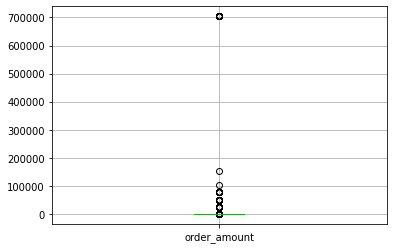

In [5]:
# To visualize the descriptive statistics of order_amount

input_df.boxplot('order_amount')


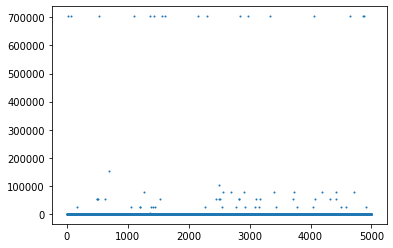

In [6]:
# To visualize the frequency pattern of order_amount


import matplotlib.pyplot as plt

plt.scatter(x=input_df['order_id'], y=input_df['order_amount'], s=1)
plt.show()


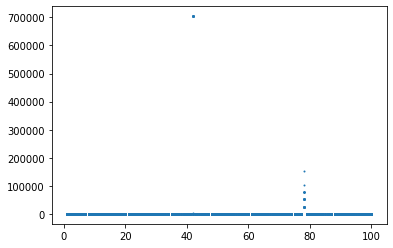

In [7]:
# To visualize the relation between shop_id and order_amount

plt.scatter(x=input_df['shop_id'], y=input_df['order_amount'], s=1)
plt.show()


The outliers need not to be removed unless it is susspected to be fradulent, manual error or due to some bug in the software. I choose not to remove the outliers.

In such situation where there are outliers that makes it difficult to calculate the average value by just calculating the mean, it is always advisable to report other satistics like the mode and median in addition to the mean. 

Here the modal value of the order_amount gives us the value of the most frequent occuring order_amount. The significance of the modal value is that we can consider this value as the least value of our range of AOV. So in order to improve the AOV we should make plans to sell the products having order_value more than the modal value.


In [8]:
# The modal value would be an appropriate metric to get the most frequent occurring value.
# Here the mode = 153 

input_df.order_amount.mode()

0    153
dtype: int64

In [9]:
# The median value should also provide an insight of the mid value of all the orders.
# Here the median = 284

input_df.order_amount.median()


284.0